In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

results = spotify.artist_albums(birdy_uri, album_type='album')

albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live in London
Birdy
Birdy
Birdy
Birdy
Birdy (Deluxe Version)


In [5]:
name = 'Radiohead'

results = spotify.search(q='artist:' + name, type='artist')

for k, v in results.items():
    print(k, v)

artists {'href': 'https://api.spotify.com/v1/search?query=artist%3ARadiohead&type=artist&offset=0&limit=10', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'}, 'followers': {'href': None, 'total': 5599419}, 'genres': ['alternative rock', 'art rock', 'melancholia', 'oxford indie', 'permanent wave', 'rock'], 'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb', 'id': '4Z8W4fKeB5YxbusRsdQVPb', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/afcd616e1ef2d2786f47b3b4a8a6aeea24a72adc', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/563754af10b3d9f9f62a3458e699f58c4a02870f', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/4067ea225d8b42fa6951857d3af27dd07d60f3c6', 'width': 160}], 'name': 'Radiohead', 'popularity': 82, 'type': 'artist', 'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/17mBFWKyCyp506a3n6XUWA'}, 'followers': {'hre

In [20]:

results = spotify.search(q='love', type='track')

for track in results["tracks"]:
    print(track["items"])

TypeError: string indices must be integers

In [16]:
results["tracks"]["items"][0]

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
    'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
    'id': '66CXWjxzNUsdJxJ2JdwvnR',
    'name': 'Ariana Grande',
    'type': 'artist',
    'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
  'available_markets': ['AD',
   'AE',
   'AL',
   'AR',
   'AT',
   'AU',
   'BA',
   'BE',
   'BG',
   'BH',
   'BO',
   'BR',
   'BY',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HR',
   'HU',
   'ID',
   'IE',
   'IL',
   'IN',
   'IS',
   'IT',
   'JO',
   'JP',
   'KW',
   'KZ',
   'LB',
   'LI',
   'LT',
   'LU',
   'LV',
   'MA',
   'MC',
   'MD',
   'ME',
   'MK',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'OM',
   'PA',
   'PE',
   'PH',
   'PL',
   'PS'

In [19]:

urn = 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'

artist = spotify.artist(urn)
print(artist)

{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'}, 'followers': {'href': None, 'total': 52571724}, 'genres': ['dance pop', 'pop', 'post-teen pop'], 'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR', 'id': '66CXWjxzNUsdJxJ2JdwvnR', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/f8c793519d837ca2f920c561535fe62ef32e8e5b', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/610f278171ed793b0d6c771f2877e5d4fd533d38', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/03345cd15fe15956bbc204131ac1b45991b99bb6', 'width': 160}], 'name': 'Ariana Grande', 'popularity': 99, 'type': 'artist', 'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}


In [67]:
from tqdm import tqdm_notebook as tqdm

love_songs = []

for offset in tqdm(range(1000)):
    results = spotify.search(q='love', type='track', limit=50, offset=offset)
    items = results["tracks"]["items"]
    for item in items:
        for artist in item['artists']:
            love_songs.append({"artist": artist["name"], "artist_id": artist['id'], "song": item["name"]})

<ipython-input-67-eb6122f8817d>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for offset in tqdm(range(1000)):


In [68]:
import pandas as pd
love_songs = pd.DataFrame(love_songs)

In [66]:

from tqdm import tqdm_notebook as tqdm

money_songs = []

for offset in tqdm(range(1000)):
    results = spotify.search(q='money', type='track', limit=50, offset=offset)
    items = results["tracks"]["items"]
    for item in items:
        for artist in item['artists']:
            money_songs.append({"artist": artist["name"], "artist_id": artist['id'], "song": item["name"]})

<ipython-input-66-16dbda4add3b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for offset in tqdm(range(1000)):


In [69]:
money_songs = pd.DataFrame(money_songs)

In [96]:
artists

,index,artist,artist_id
0,0,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg
1,5555,Trippie Redd,6Xgp2XMz1fhVYe7i6yNAax
2,554726,Rihanna,5pKCCKE2ajJHZ9KAiaK11H
3,582914,Lil Tecca,4Ga1P7PMIsmqEZqhYZQgDo
4,709252,Sam Smith,2wY79sveU1sp5g7SokKOiI
...,...,...,...
98,2965567,Rich The Kid,1pPmIToKXyGdsCF6LmqLmI
99,2971567,Anderson .Paak,3jK9MiCrA42lLAdMGUZpwa
100,2979067,Mötley Crüe,0cc6vw3VN8YlIcvr1v7tBL
101,2981567,The Drums,0p5axeJsbtTCXBrRVoKjwu


In [86]:
artists = love_songs.merge(money_songs, on="artist", how="inner", suffixes=('_love', '_money'))[["artist", "artist_id_money"]]

artists = artists.drop_duplicates().reset_index()

artists = artists.rename(columns={"artist_id_money": "artist_id"})

In [103]:
def get_all_albums(artist_id):
    '''Ok to get the first 10'''
    results = spotify.artist_albums(artist_id, album_type='album', limit=50)
    out = []
    for i in results['items']:
        out.append(i["id"])
    return out

In [111]:
def get_tracks_from_album(album_id):
    tracks = []
    for track in spotify.album_tracks(album_id)['items']:
        tracks.append(track["name"])
    return tracks

def get_tracks_from_all_albums(artist_id):
    albums = get_all_albums(artist_id=artist_id)
    all_tracks = []
        
    for album_id in albums:
        tracks = get_tracks_from_album(album_id)
        all_tracks = all_tracks + tracks

    return all_tracks

In [117]:
all_tracks = []

for artist_id in tqdm(artists["artist_id"]):
    tracks = get_tracks_from_all_albums(artist_id)
    for track in tracks:
        all_tracks.append({"artist_id": artist_id, "track": track})

<ipython-input-117-cfddc904af12>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for artist_id in tqdm(artists["artist_id"]):


In [118]:
all_tracks = pd.DataFrame(all_tracks)

In [131]:
love_tracks = all_tracks[all_tracks["track"].str.lower().str.contains("love")]

love_tracks = love_tracks.drop_duplicates().reset_index()

In [134]:
money_tracks = all_tracks[all_tracks["track"].str.lower().str.contains("money")]

money_tracks = money_tracks.drop_duplicates().reset_index()

In [165]:
artist_money = pd.DataFrame(money_tracks.value_counts(subset=['artist_id'], sort=True)).reset_index()

artist_money = artist_money.rename(columns={0: "Nmoney"})

artist_money

,artist_id,Nmoney
0,6Ha4aES39QiVjR0L2lwuwq,13
1,0z4gvV4rjIZ9wHck67ucSV,8
2,1RyvyyTE3xzB2ZywiAwp0i,8
3,55Aa2cqylxrFIXC767Z865,6
4,3WrFJ7ztbogyGnTHbHJFl2,6
...,...,...
66,2bA6fzP0lMAQ4kz6CF61w8,1
67,2YZyLoL8N0Wb9xBt1NhZWg,1
68,2EMAnMvWE2eb56ToJVfCWs,1
69,4mxWe1mtYIYfP040G38yvS,1


In [166]:
artist_love = pd.DataFrame(love_tracks.value_counts(subset=['artist_id'], sort=True)).reset_index()

artist_love = artist_love.rename(columns={0: "Nlove"})

artist_love

,artist_id,Nlove
0,38h03gA85YYPeDPd9ER9rT,54
1,5a2EaR3hamoenG9rDuVn8j,44
2,1Cs0zKBU1kc0i8ypK3B9ai,33
3,3WrFJ7ztbogyGnTHbHJFl2,28
4,4mxWe1mtYIYfP040G38yvS,26
...,...,...
81,28ExwzUQsvgJooOI0X1mr3,1
82,2y246nnP9pQT0E6v3ZMMOO,1
83,3MZsBdqDrRTJihTHQrO6Dq,1
84,4MCBfE4596Uoi2O4DtmEMz,1


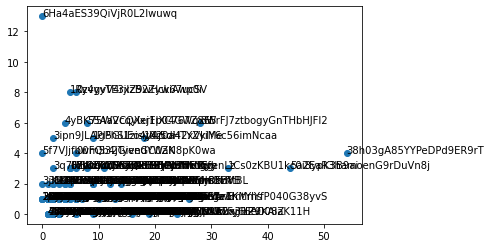

In [191]:
import matplotlib.pyplot as plt

merged = artist_love.merge(artist_money, how='outer').fillna(0)

fig, ax = plt.subplots()

ax.scatter(merged["Nlove"].to_list(), merged["Nmoney"].to_list())

for i, txt in enumerate(merged["artist_id"]):
    ax.annotate(txt, (merged["Nlove"][i], merged["Nmoney"][i]))